In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [9]:
file_path = r"data/XCM/wmz/BrainFlow-RAW_2025-05-18_17-04-18_0.csv"
data = np.loadtxt(file_path, delimiter='\t')

# Extract EEG channels 1 to 8 (EXG Channel 0 ~ 7)
# eeg_data = data[2500:, 1:9]
eeg_data = data[2500:2500+1350000, 1:9]

print("Shape:", eeg_data.shape)
print(eeg_data[:5])

Shape: (1350000, 8)
[[  -451.348776   6692.335807 -44253.592998  -4136.100904   9816.05915
  -21283.420477 -20815.173783  15841.88829 ]
 [  -485.859869   6659.18817  -44286.785339  -4168.913265   9784.096156
  -21315.450527 -20842.912298  15811.825193]
 [  -504.881204   6643.988984 -44302.923298  -4184.470079   9769.120487
  -21329.107443 -20855.719847  15799.621141]
 [  -435.881369   6709.501947 -44240.964263  -4123.092189   9831.951241
  -21263.885053 -20787.524675  15866.855188]
 [  -491.76073    6653.197903 -44296.530699  -4182.369015   9772.585007
  -21324.32417  -20850.646001  15800.492859]]


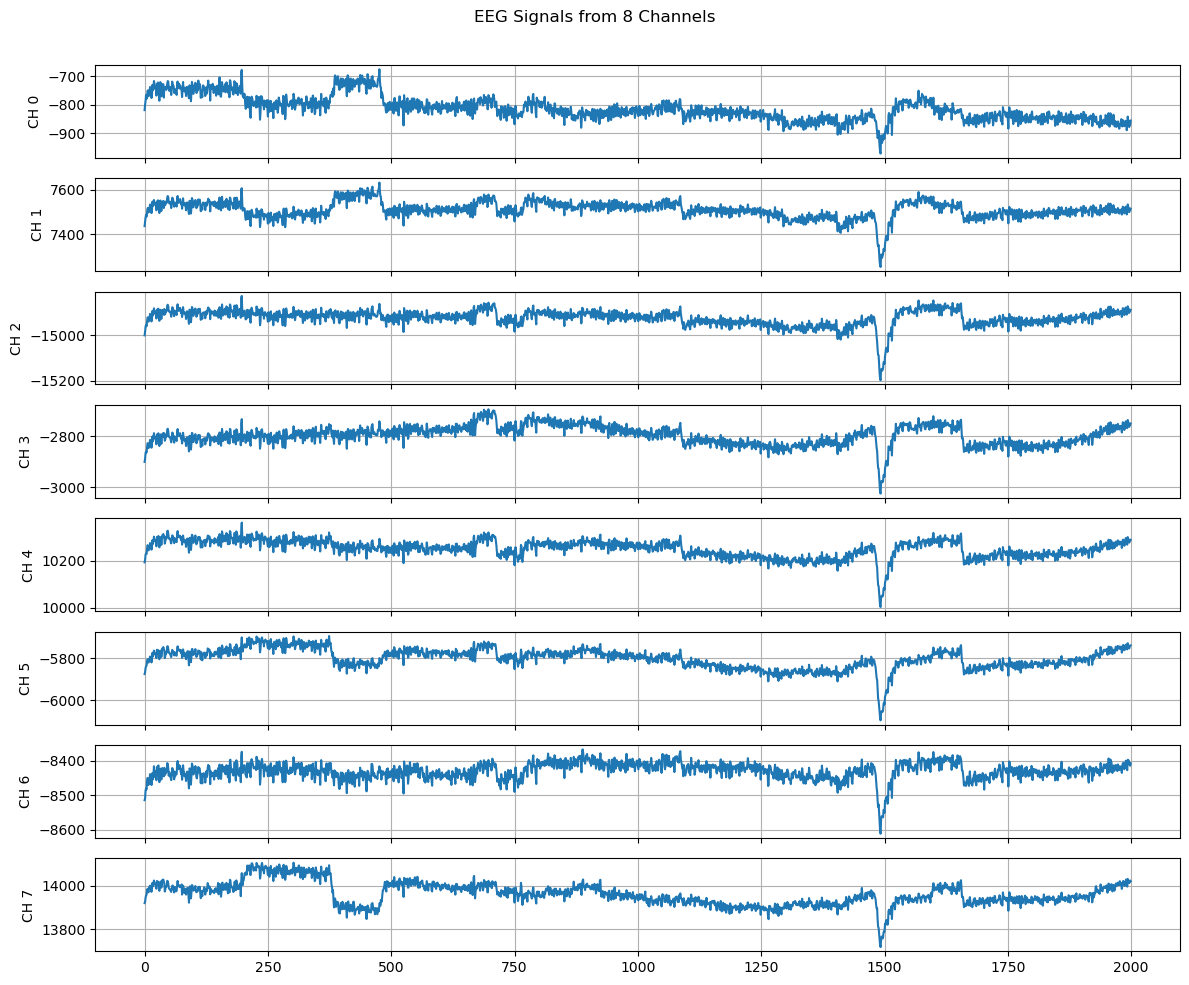

In [10]:
fig, axes = plt.subplots(8, 1, figsize=(12, 10), sharex=True)

for i in range(8):
    axes[i].plot(eeg_data[-2000:, i])
    axes[i].set_ylabel(f"CH {i}")
    axes[i].grid(True)

plt.suptitle("EEG Signals from 8 Channels")
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [11]:
# label = pd.read_csv('data\XCM\score\lrl.csv')["激动"].to_numpy()
label = pd.read_csv('data\XCM\score\lrl.csv')["开心"].to_numpy()

# EEG data shape: (1350000, 8)
# Excitement label shape: (180,)
segment_size = 1000  # number of samples per segment (4 seconds at 250Hz)
sampling_rate = 250  # Hz
duration_per_label = 30  # seconds
samples_per_label = sampling_rate * duration_per_label  # 7500 samples per label

# Split EEG into segments of 1000 samples
num_segments = eeg_data.shape[0] // segment_size
eeg_segments = eeg_data[:num_segments * segment_size].reshape(num_segments, segment_size, -1)

# Generate new labels per 4-second segment
new_labels = []
for i in range(num_segments):
    # Calculate start and end sample index of the segment
    start_sample = i * segment_size
    end_sample = start_sample + segment_size

    # Map to original label indices
    start_label_idx = start_sample // samples_per_label
    end_label_idx = (end_sample - 1) // samples_per_label  # -1 to stay within range

    if start_label_idx == end_label_idx:
        # Within the same 30s label window
        new_labels.append(label[start_label_idx])
    else:
        # Spans two label windows, take the average
        avg_label = (label[start_label_idx] + label[end_label_idx]) / 2
        new_labels.append(avg_label)

new_labels = np.array(new_labels)

np.save('data\XCM\happiness_labels.npy', new_labels)
np.save('data\XCM\wmz\X.npy', eeg_segments)